In [10]:

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')



In [11]:
!ls ../dogcat-data/train/dog/

dog.100.jpg  dog.250.jpg  dog.400.jpg  dog.550.jpg  dog.700.jpg  dog.850.jpg
dog.101.jpg  dog.251.jpg  dog.401.jpg  dog.551.jpg  dog.701.jpg  dog.851.jpg
dog.102.jpg  dog.252.jpg  dog.402.jpg  dog.552.jpg  dog.702.jpg  dog.852.jpg
dog.103.jpg  dog.253.jpg  dog.403.jpg  dog.553.jpg  dog.703.jpg  dog.853.jpg
dog.104.jpg  dog.254.jpg  dog.404.jpg  dog.554.jpg  dog.704.jpg  dog.854.jpg
dog.105.jpg  dog.255.jpg  dog.405.jpg  dog.555.jpg  dog.705.jpg  dog.855.jpg
dog.106.jpg  dog.256.jpg  dog.406.jpg  dog.556.jpg  dog.706.jpg  dog.856.jpg
dog.107.jpg  dog.257.jpg  dog.407.jpg  dog.557.jpg  dog.707.jpg  dog.857.jpg
dog.108.jpg  dog.258.jpg  dog.408.jpg  dog.558.jpg  dog.708.jpg  dog.858.jpg
dog.109.jpg  dog.259.jpg  dog.409.jpg  dog.559.jpg  dog.709.jpg  dog.859.jpg
dog.110.jpg  dog.260.jpg  dog.410.jpg  dog.560.jpg  dog.710.jpg  dog.860.jpg
dog.111.jpg  dog.261.jpg  dog.411.jpg  dog.561.jpg  dog.711.jpg  dog.861.jpg
dog.112.jpg  dog.262.jpg  dog.412.jpg  dog.562.jpg  dog.712.jpg  dog.862.jpg

In [12]:
import os
import glob
from shutil import copyfile
if not os.path.exists("augment/dog"):
    os.makedirs("augment/dog")
d = glob.glob("../dogcat-data/train/dog/*")[0]
print(d)
copyfile(d, "augment/dog/"+ d.split("/")[-1])

../dogcat-data/train/dog/dog.894.jpg


'augment/dog/dog.894.jpg'

In [13]:
train_iter = train_datagen.flow_from_directory(
    "augment",
    target_size=(100, 100),
    batch_size=9,
    class_mode="categorical"
)

Found 2 images belonging to 2 classes.


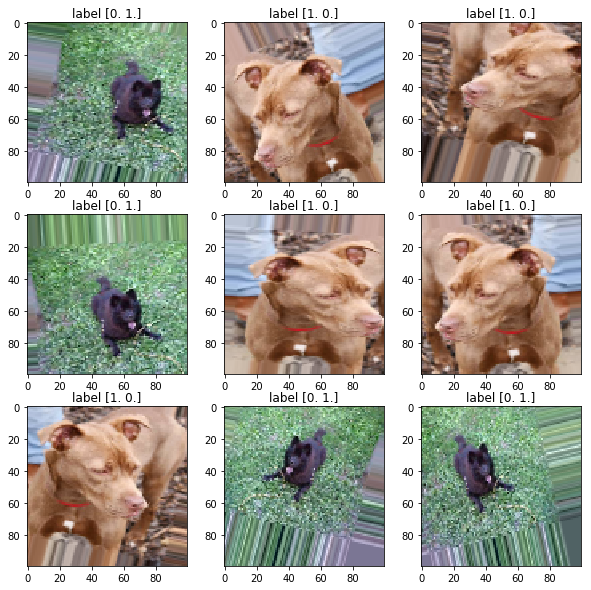

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (10,10)
for i in range(9):
    images, labels = next(train_iter)
    plt.subplot(3,3,i+1)
    plt.imshow((images[0] - np.min(images[0])) / np.ptp(images[0]), interpolation='none')
    plt.title("label {}".format(labels[0]))